**รายชื่อสมาชิก** 

1. นางสาวณัฐชา สุภาพจันทร์ 6209050040 

2. นางสาวสุพิชชา จำปาทอง 62090500424 

3. นายสหัสวรรษ ประคอง 62090500440 

4. นายนพคุณ อนันตกิจถาวร 62090500447 

In [423]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import numpy as np


import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual


In [424]:
aSales = pd.read_csv('input/Asales.csv')
bSales = pd.read_csv('input/Bsales.csv')
covid19 = pd.read_csv('input/covid-19.csv')
item_cat = pd.read_csv('input/item_categories.csv')
items = pd.read_csv('input/items.csv')
shops = pd.read_csv('input/shops.csv')

<h1>Part 1<h1>

<h1>Part 2<h1>

<h2>ข้อที่ 3</h2>

In [383]:
#ลบรายการที่มีค่าน้อยกว่า 0
#ลบรายการ item_price ที่น้อยกว่า 0
aSales.drop(aSales[aSales.item_price < 0].index, inplace=True)
#ลบรายการ item_cnt_day ที่น้อยกว่า 0
aSales.drop(aSales[aSales.item_cnt_day < 0].index, inplace=True)

#แสดงรายการ
aSales[['item_price', 'item_cnt_day']]

,item_price,item_cnt_day
0,999.00,1.0
1,899.00,1.0
3,1709.05,1.0
4,1099.00,1.0
5,349.00,1.0
...,...,...
2935844,299.00,1.0
2935845,299.00,1.0
2935846,349.00,1.0
2935847,299.00,1.0


In [386]:
aSales[(aSales.item_price < 0)]
#เช็คว่ามีค่าที่ < 0 อยู่หรือไม่

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,allsum


In [387]:
aSales[(aSales.item_cnt_day < 0)]
#เช็คว่ามีค่าที่ < 0 อยู่หรือไม่

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,allsum


<h2>ข้อที่ 4</h2>

In [100]:
def IQR(x):
    sale = np.array(x)
    upper_quartiles = np.percentile(sale, 75)
    lower_quartiles = np.percentile(sale, 25)
    IQR = (upper_quartiles - lower_quartiles) 
    
    return  IQR
result = IQR(aSales['item_price'])
#หาค่าเฉลี่ย mean พิสัย ของข้อมูล item_price

In [228]:
print('mean   = ',aSales['item_price'].mean())
print('median = ', aSales['item_price'].median())
print('IQR    = ', result)
#ประกาศค่า mean median IQR ที่หามา

mean   =  889.4667512710128
median =  399.0
IQR    =  750.0


<h2>ข้อที่ 5</h2>

In [113]:
pd.merge(aSales, shops)
#รวม 2 ตารางเข้าด้วยกัน

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,shop_name
0,2013-02-01,0,59,22154,999.0,1.0,NaN
1,2013-10-01,0,59,22151,399.0,1.0,NaN
2,2013-04-01,0,59,5603,699.0,1.0,NaN
3,2013-01-19,0,59,5587,199.0,2.0,NaN
4,2013-01-31,0,59,5613,5571.0,1.0,NaN
...,...,...,...,...,...,...,...
2935844,2015-10-30,33,36,20231,169.0,1.0,NaN
2935845,2015-10-18,33,36,20334,1949.0,1.0,NaN
2935846,2015-10-31,33,36,20339,1549.0,1.0,NaN
2935847,2015-10-31,33,36,20352,1549.0,1.0,NaN


<h2>ข้อที่ 6</h2>

In [124]:
aSales['datetime'] = pd.to_datetime(aSales['date'],format='%Y-%m-%d')
aSales[['datetime']]
#เปลี่ยนข้อมูล date ให้เป็น String

,datetime
0,2013-02-01
1,2013-03-01
2,2013-05-01
3,2013-06-01
4,2013-01-15
...,...
2935844,2015-10-10
2935845,2015-09-10
2935846,2015-10-14
2935847,2015-10-22


<h2>ข้อที่ 7</h2>

In [134]:
allitem = aSales['item_id'].drop_duplicates().count()
allitem
#รวม item ใน shop

21807

<h2>ข้อ 8</h2>

In [253]:
whatitem = pd.pivot_table(aSales,values=['item_cnt_day'], index=["shop_id","item_id"], aggfunc=np.sum )
whatitem.sort_values(by='item_cnt_day' ,ascending=False).head(10) 
#item สูงสุด 10 item

item_cnt_day
shop_id item_id              
31      20949         19934.0
25      20949         14343.0
28      20949         13458.0
54      20949         12323.0
42      20949         10514.0
27      20949          8266.0
12      11373          6563.0
        11370          6163.0
57      20949          6116.0
47      20949          4530.0

<h2>ข้อที่ 9</h2>

In [298]:
iitem = pd.pivot_table(aSales, index=['shop_id'],values=['item_price'], aggfunc=[np.mean,np.std],fill_value=0)
iitem
#หาค่า mean std ของ iitem ทั้งหมด
 

,mean,std
,item_price,item_price
shop_id,,
0,563.444151,1243.793025
1,515.350652,1202.199688
2,1349.202548,2223.272910
3,1033.090115,1819.739914
4,922.435604,1875.096882
5,869.640755,1749.183170
6,900.037157,1763.799760
7,964.949582,1894.815612


In [282]:
iitem.max()
#หาค่า มากสุด ของ mean std


mean  item_price    1458.681647
std   item_price    3145.111321
dtype: float64

In [283]:
iitem.min()
#หาค่า น้อยสุด ของ mean std

mean  item_price    299.237067
std   item_price    672.862878
dtype: float64

In [291]:
iitem = pd.pivot_table(aSales, index=['shop_id'],values=['item_price'], aggfunc=np.mean,fill_value=0)
iitem = iitem.sort_values(by=['item_price'] ,ascending=False).head(5)
iitem
#หาค่า mean จากสูงสุด 5 อันดับ โดยเรียงจากมากไปน้อย

,item_price
shop_id,
12,1458.681647
2,1349.202548
34,1333.117005
20,1330.690635
9,1254.521438


In [299]:
iitem = pd.pivot_table(aSales, index=['shop_id'],values=['item_price'], aggfunc=np.mean,fill_value=0)
iitem = iitem.sort_values(by=['item_price'] ,ascending=True).head(5)
iitem = iitem.sort_values(by=['item_price'] ,ascending=False).head(5)
iitem
#หาค่า mean จากต่ำสุด 5 อันดับ โดยเรียงจากมากไปน้อย

,item_price
shop_id,
55,607.882815
0,563.444151
1,515.350652
51,491.877436
13,299.237067


<h2>ข้อที่ 10</h2>

In [363]:
aSales["allsum"] = aSales["item_price"] * aSales["item_cnt_day"] 
aSales.head()
#สร้างตาราง allsum คือผลคูณของ item_price กับ item_cnt_day

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,allsum
0,02.01.2013,0,59,22154,999.00,1.0,999.00
1,03.01.2013,0,25,2552,899.00,1.0,899.00
3,06.01.2013,0,25,2554,1709.05,1.0,1709.05
4,15.01.2013,0,25,2555,1099.00,1.0,1099.00
5,10.01.2013,0,25,2564,349.00,1.0,349.00


In [329]:
sumprice = pd.pivot_table(aSales, index=['shop_id'],values=['allsum'], aggfunc=np.sum,fill_value=0)
sumprice = sumprice.sort_values(by=['allsum'] ,ascending=False)
#สร้างtable sumprice 
sumprice['allsum']  =  sumprice['allsum'].round()
sumprice['allsum'].head()
#ปัดเศษของยอดรวม

shop_id
31    235661083.0
25    216967636.0
28    160129606.0
42    152279148.0
54    142421820.0
Name: allsum, dtype: float64

In [345]:
sep = pd.qcut(sumprice['allsum'],6)
pd.value_counts(sep)
#แบ่งกลุ่มเป็น 6 กลุ่ม

(379460.999, 6632128.833]     10
(6632128.833, 33013813.0]     10
(33013813.0, 46873321.5]      10
(46873321.5, 65453978.667]    10
(65453978.667, 79041850.5]    10
(79041850.5, 235661083.0]     10
Name: allsum, dtype: int64

In [365]:
a = 10
sumprice['Group'] = (['1']*a) + (['2'] *a) + (['3']*a) + (['4']*a) + (['5']*a) + (['6']*a)
sumprice['Group']
#นำค่าที่ได้จากด้านบนมา * 10 จะได้กลุ่ม 6 กลุ่ม

shop_id
31    1
25    1
28    1
42    1
54    1
27    1
57    1
12    1
6     1
18    1
50    2
47    2
46    2
35    2
24    2
58    2
15    2
26    2
7     2
38    2
19    3
21    3
43    3
22    3
56    3
16    3
29    3
53    3
55    3
14    3
30    4
41    4
37    4
59    4
52    4
2     4
45    4
4     4
5     4
44    4
3     5
48    5
17    5
51    5
49    5
10    5
39    5
9     5
34    5
0     5
20    6
13    6
33    6
32    6
23    6
40    6
1     6
8     6
11    6
36    6
Name: Group, dtype: object

In [366]:
tab = pd.pivot_table(sumprice,index=['Group'],values=['allsum'], aggfunc=np.sum,fill_value=0)
tab
#นำค่ามาโชว์โดยรวมค่าในกลุ่มของตนเอง 

,allsum
Group,
1,1457010720
2,705706210
3,577831286
4,428619765
5,199854463
6,40833589


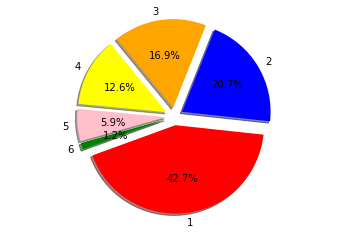

In [382]:
labels = ['1', '2', '3', '4','5','6']
sizes = [tab.iloc[0,0],tab.iloc[1,0], tab.iloc[2,0],tab.iloc[3,0],tab.iloc[4,0],tab.iloc[5,0]]
c = ['red','blue','orange','yellow','pink','green']
explode = (0.1, 0.1, 0.1, 0.1, 0.1, 0.1) 

plt.pie(sizes, explode=explode, labels=labels, colors=c, 
        autopct='%2.1f%%', shadow=True, startangle=200);
plt.axis('equal');
plt.show();

#สร้าง pie chart แสดงค่าต่าง ๆ ของกลุ่ม 6 กลุ่ม โดยจะแยกสีตามกลุ่มแต่ละกลุ่ม 
#เพื่อให้เห็นภาพที่ชัดเจนยิ่งขึ้น


<h2>ข้อที่ 11</h2>

In [362]:
#เอา dataset ประกอบด้วย Asales.csv และ items.csv มารวมกัน
a = pd.merge(aSales, items, on='item_id')
a

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,allsum,item_name,item_category_id
0,02.01.2013,0,59,22154,999.0,1.0,999.0,iname22154,37
1,23.01.2013,0,24,22154,999.0,1.0,999.0,iname22154,37
2,20.01.2013,0,27,22154,999.0,1.0,999.0,iname22154,37
3,02.01.2013,0,25,22154,999.0,1.0,999.0,iname22154,37
4,03.01.2013,0,25,22154,999.0,1.0,999.0,iname22154,37
...,...,...,...,...,...,...,...,...,...
2928487,17.10.2015,33,25,8428,249.0,1.0,249.0,iname8428,40
2928488,01.10.2015,33,25,7903,12198.0,1.0,12198.0,iname7903,15
2928489,29.10.2015,33,25,7610,2890.0,1.0,2890.0,iname7610,64
2928490,22.10.2015,33,25,7635,2100.0,1.0,2100.0,iname7635,64


In [355]:
#สร้างคอลัมใหม่ Salesprice และ week
a['Salesprice'] =a['item_price'] * a['item_cnt_day']
                                                     
#แปลงค่า date จาก String เป็น Date
a['date'] = a['date'].astype('datetime64[ns]')

#กำหนดคอลัม Week เพื่อบอกวันเป็นชื่อวัน
a['week']=a['date'].dt.day_name()
a

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,allsum,item_name,item_category_id,Salesprice,week
0,2013-02-01,0,59,22154,999.0,1.0,999.0,iname22154,37,999.0,Friday
1,2013-01-23,0,24,22154,999.0,1.0,999.0,iname22154,37,999.0,Wednesday
2,2013-01-20,0,27,22154,999.0,1.0,999.0,iname22154,37,999.0,Sunday
3,2013-02-01,0,25,22154,999.0,1.0,999.0,iname22154,37,999.0,Friday
4,2013-03-01,0,25,22154,999.0,1.0,999.0,iname22154,37,999.0,Friday
...,...,...,...,...,...,...,...,...,...,...,...
2928487,2015-10-17,33,25,8428,249.0,1.0,249.0,iname8428,40,249.0,Saturday
2928488,2015-01-10,33,25,7903,12198.0,1.0,12198.0,iname7903,15,12198.0,Saturday
2928489,2015-10-29,33,25,7610,2890.0,1.0,2890.0,iname7610,64,2890.0,Thursday
2928490,2015-10-22,33,25,7635,2100.0,1.0,2100.0,iname7635,64,2100.0,Thursday


In [356]:
#แปลง date จาก type date เป็น String เพื่อนำไปแยกปี
a['date'] = a['date'].astype(str)
a

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,allsum,item_name,item_category_id,Salesprice,week
0,2013-02-01,0,59,22154,999.0,1.0,999.0,iname22154,37,999.0,Friday
1,2013-01-23,0,24,22154,999.0,1.0,999.0,iname22154,37,999.0,Wednesday
2,2013-01-20,0,27,22154,999.0,1.0,999.0,iname22154,37,999.0,Sunday
3,2013-02-01,0,25,22154,999.0,1.0,999.0,iname22154,37,999.0,Friday
4,2013-03-01,0,25,22154,999.0,1.0,999.0,iname22154,37,999.0,Friday
...,...,...,...,...,...,...,...,...,...,...,...
2928487,2015-10-17,33,25,8428,249.0,1.0,249.0,iname8428,40,249.0,Saturday
2928488,2015-01-10,33,25,7903,12198.0,1.0,12198.0,iname7903,15,12198.0,Saturday
2928489,2015-10-29,33,25,7610,2890.0,1.0,2890.0,iname7610,64,2890.0,Thursday
2928490,2015-10-22,33,25,7635,2100.0,1.0,2100.0,iname7635,64,2100.0,Thursday


In [361]:
#split ปีออกมา
year = a['date'].map(lambda x: x.split('-')[0])
a['year'] = year
year

0          2013
1          2013
2          2013
3          2013
4          2013
           ... 
2928487    2015
2928488    2015
2928489    2015
2928490    2015
2928491    2015
Name: date, Length: 2928492, dtype: object

In [358]:
#สร้างตัวแปรขึ้นมารับค่าปี
year2015 =  a.loc[(a['year'] == '2015')]
a

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,allsum,item_name,item_category_id,Salesprice,week,year
0,2013-02-01,0,59,22154,999.0,1.0,999.0,iname22154,37,999.0,Friday,2013
1,2013-01-23,0,24,22154,999.0,1.0,999.0,iname22154,37,999.0,Wednesday,2013
2,2013-01-20,0,27,22154,999.0,1.0,999.0,iname22154,37,999.0,Sunday,2013
3,2013-02-01,0,25,22154,999.0,1.0,999.0,iname22154,37,999.0,Friday,2013
4,2013-03-01,0,25,22154,999.0,1.0,999.0,iname22154,37,999.0,Friday,2013
...,...,...,...,...,...,...,...,...,...,...,...,...
2928487,2015-10-17,33,25,8428,249.0,1.0,249.0,iname8428,40,249.0,Saturday,2015
2928488,2015-01-10,33,25,7903,12198.0,1.0,12198.0,iname7903,15,12198.0,Saturday,2015
2928489,2015-10-29,33,25,7610,2890.0,1.0,2890.0,iname7610,64,2890.0,Thursday,2015
2928490,2015-10-22,33,25,7635,2100.0,1.0,2100.0,iname7635,64,2100.0,Thursday,2015


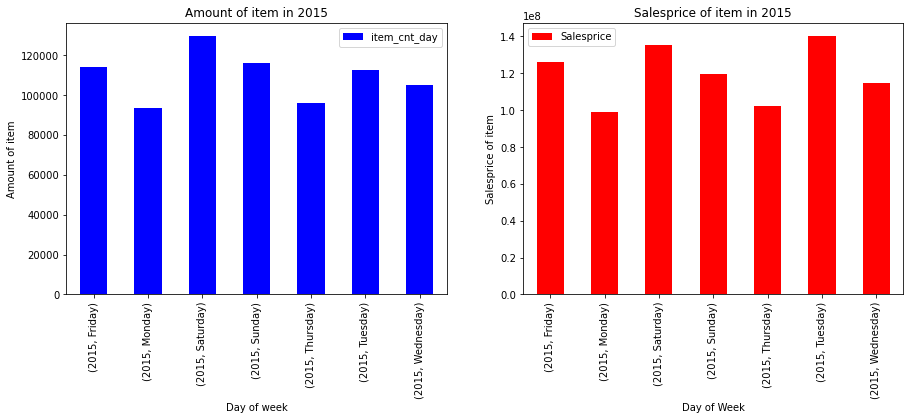

In [359]:
#สร้างกราฟที่แสดงจำนวนสินค้าที่ขายได้และยอดขายรวมในแต่ละวันของสัปดาห์ ในปี 2015
fig,axes = plt.subplots(nrows=1,ncols=2,figsize=(15,5))
item = pd.pivot_table(year2015, 
                      index=['year','week'],
                      values=['item_cnt_day'], 
                      aggfunc=np.sum,
                      fill_value=0).plot(kind='bar',ax =axes[0],color='blue')
Salesprice = pd.pivot_table(year2015, 
                            index=['year','week'],
                            values=['Salesprice'], 
                            aggfunc=np.sum,
                            fill_value=0).plot(kind='bar',ax =axes[1],color='red')

axes[0].set_title('Amount of item in 2015');
axes[1].set_title('Salesprice of item in 2015');
axes[0].set_xlabel('Day of week');
axes[0].set_ylabel('Amount of item');
axes[1].set_xlabel('Day of Week');
axes[1].set_ylabel('Salesprice of item');

<h1>Part 3<h1>